In [48]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [49]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [50]:

# 인구현황.csv 로드하여 DataFrame 객체생성 , 변수명은 df_all 
df_all = pd.read_csv('../data/인구현황.csv')
print(type(df_all))
df_all.head(5)

<class 'pandas.core.frame.DataFrame'>


,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [51]:
df = df_all.loc[df_all['행정기관'] != '전국'].copy()
df.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97


In [52]:
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
행정기관코드    0
행정기관      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64


In [17]:
df_all.columns

Index(['행정기관코드', '행정기관', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율'], dtype='object')

### 1. 지역별 총인구수 Top5

In [ ]:
top5 = df_all[['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).head(5)
print("1. 지역별 총인구수 Top5")
top5


1. 지역별 총인구수 Top5


,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


### 1-1. 지역별 총인구수 Plot

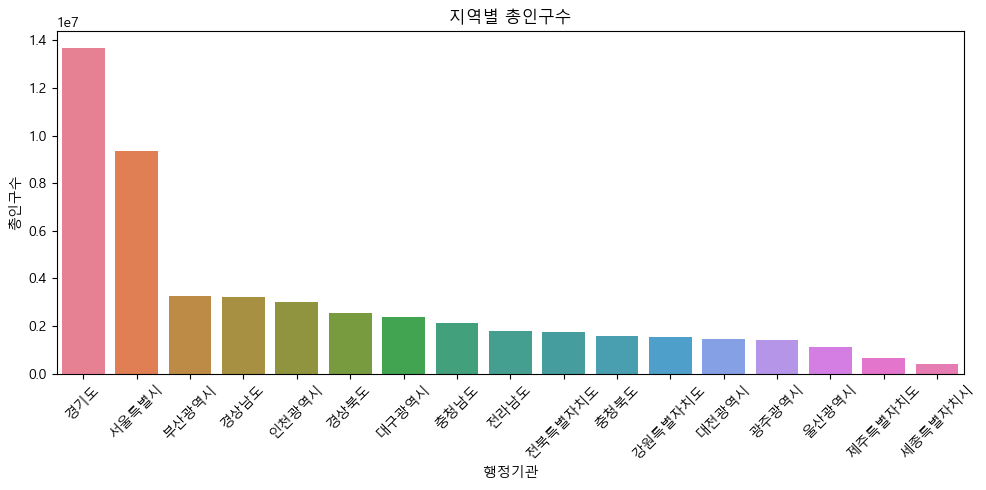

In [40]:
plt.figure(figsize=(10,5))
# seaborn의 barplot() 함수사용
sns.barplot(data=df_all.sort_values(by='총인구수', ascending=False), x='행정기관', y='총인구수',hue='행정기관')

plt.xticks(rotation=45)
plt.title('지역별 총인구수')
plt.tight_layout()
plt.show()

### 2. 세대당 인구수 높은 지역 Top5

In [39]:
top5 = df_all[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True).head(5)
print("2. 세대당 인구수 높은 지역 Top5")
top5

2. 세대당 인구수 높은 지역 Top5


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


### 2-1. 지역별 세대당 인구 Plot

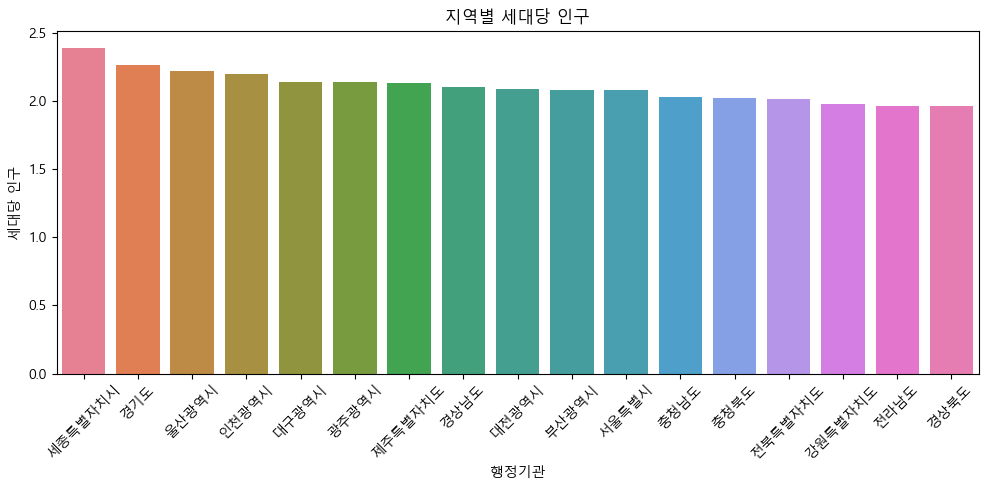

In [42]:
plt.figure(figsize=(10,5))
# seaborn의 barplot() 함수사용
sns.barplot(data=df_all.sort_values(by='세대당 인구', ascending=False), x='행정기관', y='세대당 인구',hue='행정기관')

plt.xticks(rotation=45)
plt.title('지역별 세대당 인구')
plt.tight_layout()
plt.show()

### 3. 남녀 비율 분석

In [64]:
df_filtered = df_all[df_all['행정기관'] != '전국']
gender_ratio_sorted = df_all[['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)
print("3. 남녀 비율 분석")
gender_ratio_sorted

3. 남녀 비율 분석


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


### 4. 남자초과 / 여자초과 분석
    * 남초(남자초과) => 남자 인구가 여자 인구보다 많은 지역 남여 비율 > 1 또는 남자 인구수 > 여자 인구수

    * 여초(여자초과) => 여자 인구가 남자 인구보다 많은 지역 남여 비율 < 1 또는 여자 인구수 > 남자 인구수

    * 남초여초 컬럼을 추가합니다.

In [91]:
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_all = df_all.loc[df_all['행정기관'] != '전국']


print("4. 남초 vs 여초 지역 구분")

top = df_all.groupby('행정기관', sort=False)['남여 비율'].mean()

top_df = top.reset_index()
top_df.columns = ['행정기관', '남여 비율']

top_df['남초여초'] = top_df['남여 비율'].apply(lambda x: '남초' if x > 1.00 else '여초')

top_df.index = range(1, len(top_df) + 1)

top_df


4. 남초 vs 여초 지역 구분


,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,여초
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


### 5. 세대당 인구 평균보다 높은 지역

In [79]:
top5 = df_all[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True).head(7)
print("5. 세대당 인구 평균보다 높은 지역")
# 전국 평균 세대당 인구수 계산
avg_population_per_household = df_all['세대당 인구'].mean()
# 평균 출력
print(f"전국 평균 세대당 인구수: {avg_population_per_household:.2f}")
top5

5. 세대당 인구 평균보다 높은 지역
전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


### 5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot )
###            지역별 세대수 Plot ( seaborn의 barplot )


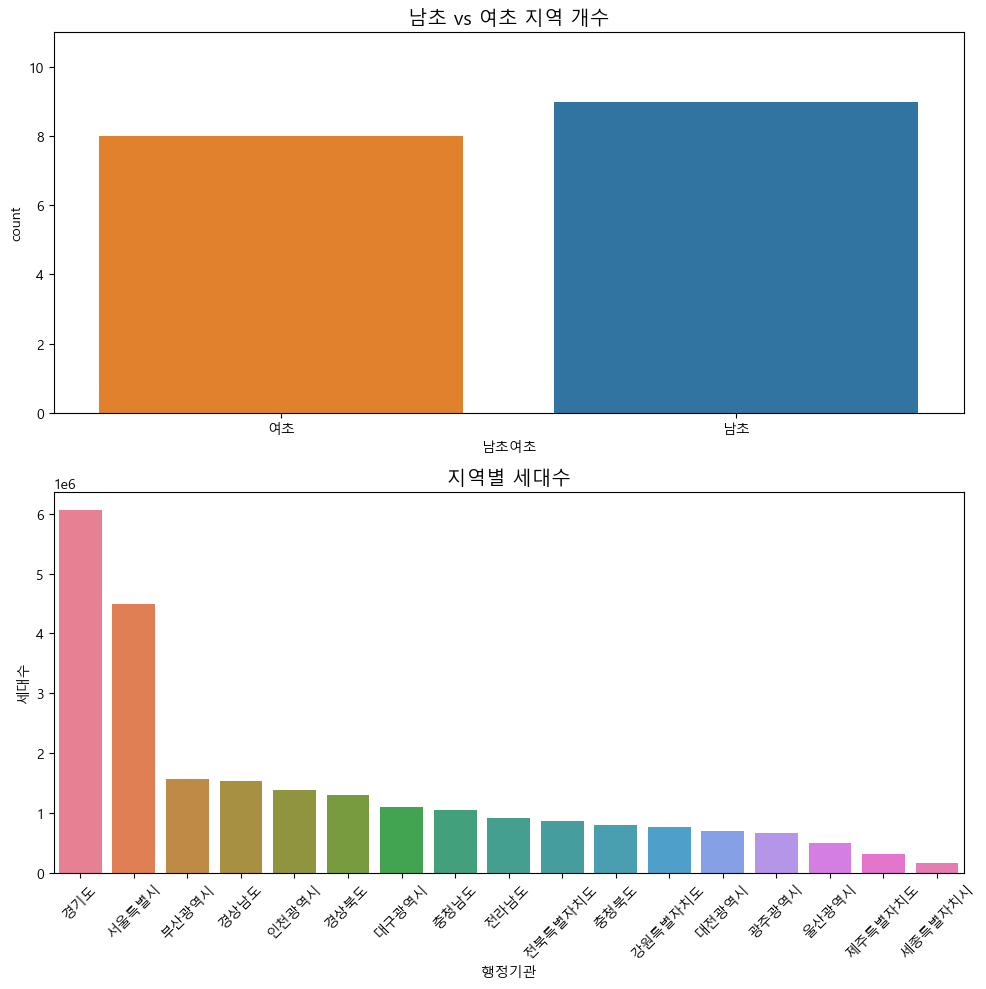

In [105]:
df_all = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_all = df_all[df_all['행정기관'] != '전국']

top = df_all.groupby('행정기관', sort=False)['남여 비율'].mean()
top_df = top.reset_index()
top_df.columns = ['행정기관', '남여 비율']
top_df['남초여초'] = top_df['남여 비율'].apply(lambda x: '여초' if x > 1.00 else '남초')

total_pop = df_all.copy()
total_pop = total_pop.sort_values(by='세대수', ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

sns.countplot(data=top_df, x='남초여초', hue='남초여초', order=['여초', '남초'], ax=axs[0])
axs[0].set_title('남초 vs 여초 지역 개수', fontsize=14)
axs[0].set_xlabel('남초여초')
axs[0].set_ylabel('count')
axs[0].set_ylim(0, top_df['남초여초'].value_counts().max() + 2)

sns.barplot(x='행정기관', y='세대수', hue='행정기관', data=total_pop, ax=axs[1])
axs[1].set_title('지역별 세대수', fontsize=14)
axs[1].set_xlabel('행정기관')
axs[1].set_ylabel('세대수')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()